In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

In [2]:
origin_data = pd.read_csv('/home/igor/data_analysis_practise/SuperStoreOrders.csv')

In [3]:
origin_data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [4]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [20]:
origin_data.isnull().sum() 

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2630
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
year                 0
dtype: int64

In [21]:
origin_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           48660 non-null  float64
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [22]:
origin_data.isnull().sum()

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2630
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
year                 0
dtype: int64

In [23]:
origin_data['sales'] = origin_data['sales'].fillna(0)

In [24]:
origin_data.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [25]:
origin_data.duplicated().sum() 

np.int64(0)

In [26]:
origin_data['sales'] = pd.to_numeric(origin_data['sales'], errors='coerce')
origin_data['discount'] = pd.to_numeric(origin_data['discount'], errors='coerce')
origin_data['profit'] = pd.to_numeric(origin_data['profit'], errors='coerce')
origin_data['quantity'] = pd.to_numeric(origin_data['quantity'], errors='coerce')
origin_data['year'] = pd.to_numeric(origin_data['year'], errors='coerce')

In [27]:
countries = origin_data['country'].unique()
sales_by_country = {}

In [28]:
for i, j in zip(origin_data['country'], origin_data['sales']):
    if i in sales_by_country:
        sales_by_country[i] += j
    else: sales_by_country[i] = j

In [29]:
sales_by_country

{'Algeria': 25407.0,
 'Australia': 516624.0,
 'Hungary': 7185.0,
 'Sweden': 23420.0,
 'Canada': 50314.0,
 'New Zealand': 106972.0,
 'Iraq': 50319.0,
 'Philippines': 120135.0,
 'United Kingdom': 300040.0,
 'Malaysia': 35778.0,
 'Guatemala': 88516.0,
 'Iran': 79132.0,
 'Thailand': 41102.0,
 'Tanzania': 18859.0,
 'Brazil': 250106.0,
 'Mexico': 416083.0,
 'Cuba': 116246.0,
 'France': 526745.0,
 'United States': 1304166.0,
 'Japan': 52045.0,
 'Sudan': 15102.0,
 'Taiwan': 2379.0,
 'Indonesia': 224180.0,
 'Vietnam': 47572.0,
 'Angola': 18247.0,
 'China': 368852.0,
 'Mozambique': 14394.0,
 'Lebanon': 2797.0,
 'Singapore': 28693.0,
 'Netherlands': 59377.0,
 'Nigeria': 51552.0,
 'Egypt': 61826.0,
 'Venezuela': 25533.0,
 'South Africa': 61584.0,
 'Spain': 165619.0,
 'India': 302511.0,
 'Turkey': 92522.0,
 'Austria': 56137.0,
 'Italy': 189965.0,
 'Germany': 389320.0,
 'Nicaragua': 101232.0,
 'Dominican Republic': 106487.0,
 'El Salvador': 123814.0,
 'Denmark': 8643.0,
 'Saudi Arabia': 49791.0,
 'Z

In [30]:
top_buying_countries = origin_data['country'].value_counts()[0:10]

<function matplotlib.pyplot.show(close=None, block=None)>

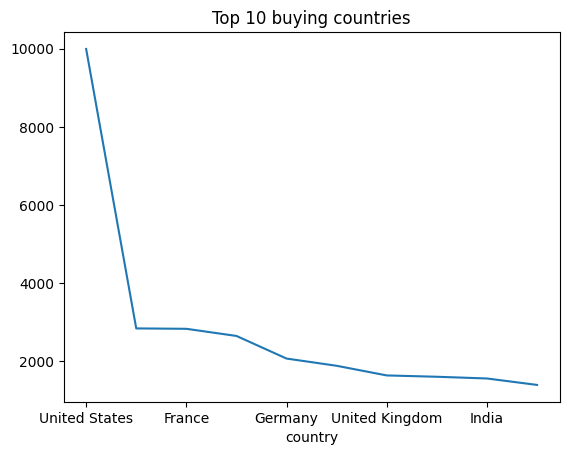

In [31]:
top_buying_countries.plot()
plt.title('Top 10 buying countries')
plt.ylabel = 'Countries'
plt.xlabel = 'Amount of sales'
plt.show